#**Predicting the S&P 500 Index Price**

### **Overview**

This project applies:

**1) Deep learning and time series forecasting techniqiues to predict day to day closing prices of the S&P 500. The following methods are explored:**

* Auto-Regressive Integrated Moving Average  (ARIMA)
* Facebook's Prophet  
* Long / Short Term Memory Neural Network (LSTM)  

**2) Machine Learning and Deep Learning Classification models to predict the movement of the index price one day in the future. This utilizes Close, Low, High, Adj Close, Volume as well as calculated technical indicators. The following methods are explored:**

* Logistic Regression
* K Nearest Neighbors 
* Random Forest
* Support Vector Classifier 
* Stochastic Gradient Descent

The models use historical price data including date, open, high, low and close from the last 12 years between 2011-1-1 to 2021-3-1. The data is split into 80% train and 20% test. The root means square error (RMSE) metric is used to test and evaluate each model's fit.

##Tools
*   Python
*   Pandas
*   Numpy
*   Matplotlib
*   Google Collab
*   Yahoo Finance API
*   MLPFinance
*   TA-Lib
*   SKLearn 
*   Keras
*   



In [66]:
#Installing Packages
!pip install yfinance
!pip install mplfinance
!pip install --upgrade ta

In [ ]:
#Importing Libraries
import yfinance as yf
import mplfinance as mpf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
import pandas_datareader.data as web
import numpy as np
import math 
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error

Using pandas web DataReader to import daily data from 01/01/2010 to 03/01/2021 from Yahoo.




In [ ]:
#Want days from start = 1/1/2010 to end = 3/1/2021
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,3,1)

#Call Yahoo Finance API to fetch data for S&P 500 Index (ticker: ^GSPC) for dates 01/01/2010-03/01/2021
sp500 = web.DataReader('^GSPC', 'yahoo', start = start, end = end)
sp500.to_csv('S&P500.csv')
sp500.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932
2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088
2021-02-26,3861.080078,3789.540039,3839.659912,3811.149902,6512950000,3811.149902
2021-03-01,3914.500000,3842.510010,3842.510010,3901.820068,5071540000,3901.820068


In [100]:
sp500.shape

(2808, 7)

###**Visualization**

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


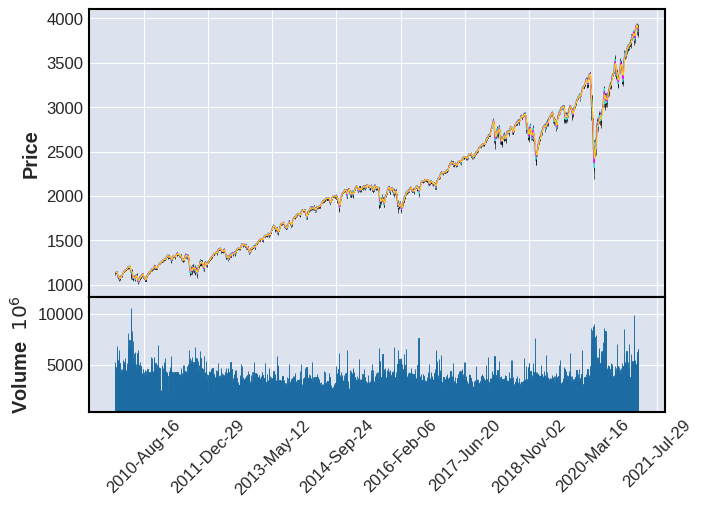

In [ ]:
mpf.plot(sp500,type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

## **Forecasting Closing Price**

In order we will explore:


1.   Auto-Regressive Integrared Moving Average
2.   PROPHET
3.   Long / Short Term Memory NN

These techniques are typically used for time-series data. We will only need the 'Close' column for our model so they require little data preparation. 



### **Auto-Regressive Integrated Moving Average (ARIMA)**

ARIMA is a statistical. method for time series forecasting. It works on the assumptions that the data series is stationary -- meaning the mean and variance should not vary over time. It uses 3 main paramateres to predict future values 


*   p- past values used for forecasting the next value 
*   q- past forecast errors used to predict the future values 
*   d- order of differencing

We will use auto ARIMA in this project which automatacilly selects the best combination of (p,d,q)

I made use of the following libraries for creating this model.

In [ ]:
# ! pip install pmdarima
import pmdarima as pm
import statsmodels
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#Split into Training and Validation
train = sp500[:int(.8*len(sp500))]
validation = sp500[int(.8*len(sp500)):]

In [ ]:
#Using auto_arima to find the best combination of p,d,q 
model_arima= auto_arima(train["Close"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=7,max_q=7,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train["Close"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18877.444, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18877.622, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18878.776, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18880.675, Time=1.31 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=18881.499, Time=1.76 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=18874.816, Time=2.37 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18877.692, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18866.949, Time=1.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18868.761, Time=3.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18870.755, Time=3.65 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18872.350, Time=4.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18878.837, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18868.761, Time=2.80 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18870.840, Time=3.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18872.743, Time=4.22

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

For a non- seasonal ARIMA to work it is necessary that the time series is stationary. This would mean that the time series does not have trend and seasonality. One possible method to check for this is the adfuller test.

The best fit model according to Auto-Arima is ARIMA(1,1,1). Lets explore the stationarity of the original data vs. one that differencing d = 1. 

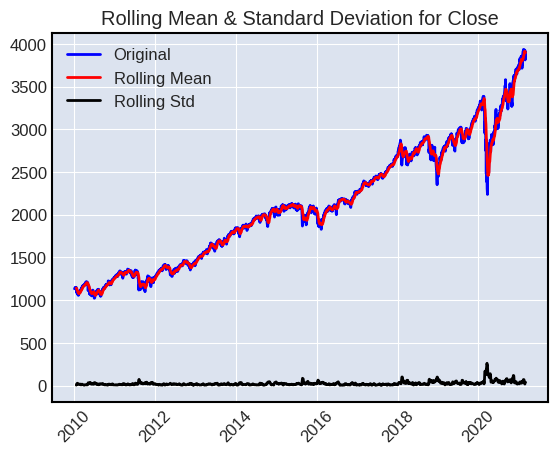

Results of Dickey-Fuller Test:
Test Statistic                    0.726814
p-value                           0.990358
# Lags Used                      27.000000
Number of Observations Used    2780.000000
Critical Value (1%)              -3.432704
Critical Value (5%)              -2.862580
Critical Value (10%)             -2.567324
dtype: float64


In [68]:
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(sp500, 'Close')

Using our original data we get a p-value of .99, which means it is clearly not stationary. Let's try differencing once like as Auto-Arima suggested and compare results. 

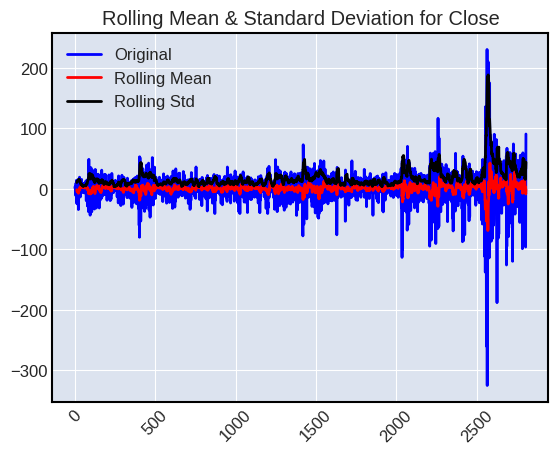

Results of Dickey-Fuller Test:
Test Statistic                -1.135855e+01
p-value                        9.599267e-21
# Lags Used                    2.600000e+01
Number of Observations Used    2.780000e+03
Critical Value (1%)           -3.432704e+00
Critical Value (5%)           -2.862580e+00
Critical Value (10%)          -2.567324e+00
dtype: float64


In [71]:
#To difference a dataset
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

sp500_diff1 = pd.DataFrame(difference(sp500['Close']), columns= ['Close'])
test_stationarity(sp500_diff1, 'Close')

There appears to be not trend and little seasonality. The ad-fuller p-value is less than 0.05 which passes the stationarity test. We can now create the ARIMA model. 

In [ ]:
#Only using 'Close' 
train_arima = train['Close'].values
validation_arima = validation['Close'].values 

history = [x for x in train_arima]
arima_predictions = []
for t in range(len(validation_arima)):
  model = ARIMA(history, order = (1,1,1))
  model_fit = model.fit(disp = 0)
  output = model_fit.forecast()
  yhat = output[0]
  arima_predictions.append(yhat)
  obs = validation_arima[t]
  history.append(obs)

Streaming output truncated to the last 5000 lines.
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/pytho

In [ ]:
arima_RMSE = math.sqrt(mean_squared_error(validation_arima, arima_predictions))
print(arima_RMSE)

44.79821619111146


In [ ]:
arima_pred_df = pd.DataFrame(arima_predictions, columns= ['Prediction'])

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train["Close"], mode='lines',name="Train Data for Stock Prices"))
fig.add_trace(go.Scatter(x=validation.index, y=validation["Close"], mode='lines',name="Validation Data for Stock Prices",))
fig.add_trace(go.Scatter(x=validation.index, y=arima_pred_df['Prediction'], mode='lines',name="Prediction for Stock Prices",))
fig.update_layout(title="ARIMA",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

Focusing on just the Prediction and Test Data.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=validation.index, y=validation["Close"], mode='lines',name="Validation Data for Stock Prices",))
fig.add_trace(go.Scatter(x=validation.index, y=arima_pred_df['Prediction'], mode='lines',name="Prediction for Stock Prices",))
fig.update_layout(title="ARIMA",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

We obtain an RMSE of 44.79 which is pretty good! This model demonstrated to offer pretty good predictions. One thing to note in the predictions is although they appear to be pretty close to the true value, the prediction always seems to be delayed in predicting spikes or falls. 

### **Facebook's Prophet**

Prophet, created by Facebook, is a time series forecasting library that requires no preprocessing. The model takes a dataframe with two columns, data(ds) and target(y) and captures the trend and seasonality in past data. 

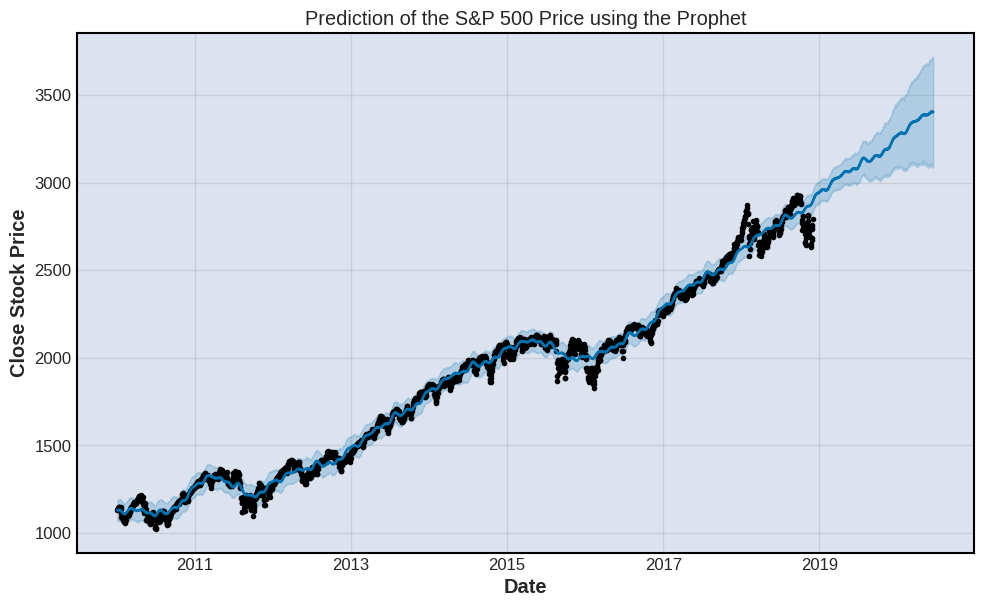

In [ ]:
from fbprophet import Prophet

#Add Date values into the first column
dates =[]
for x in range(len(sp500)):
    newdate = str(sp500.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

# Add date values also as a first column
sp500.insert(0,'Date', dates)

# Select only the important features i.e. the date and price
data = sp500[:int(.8*len(sp500))]
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

future = m.make_future_dataframe(periods=len(validation)) #we need to specify the number of days in future
prophet_prediction = m.predict(future)
m.plot(prophet_prediction)

plt.title("Prediction of the S&P 500 Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

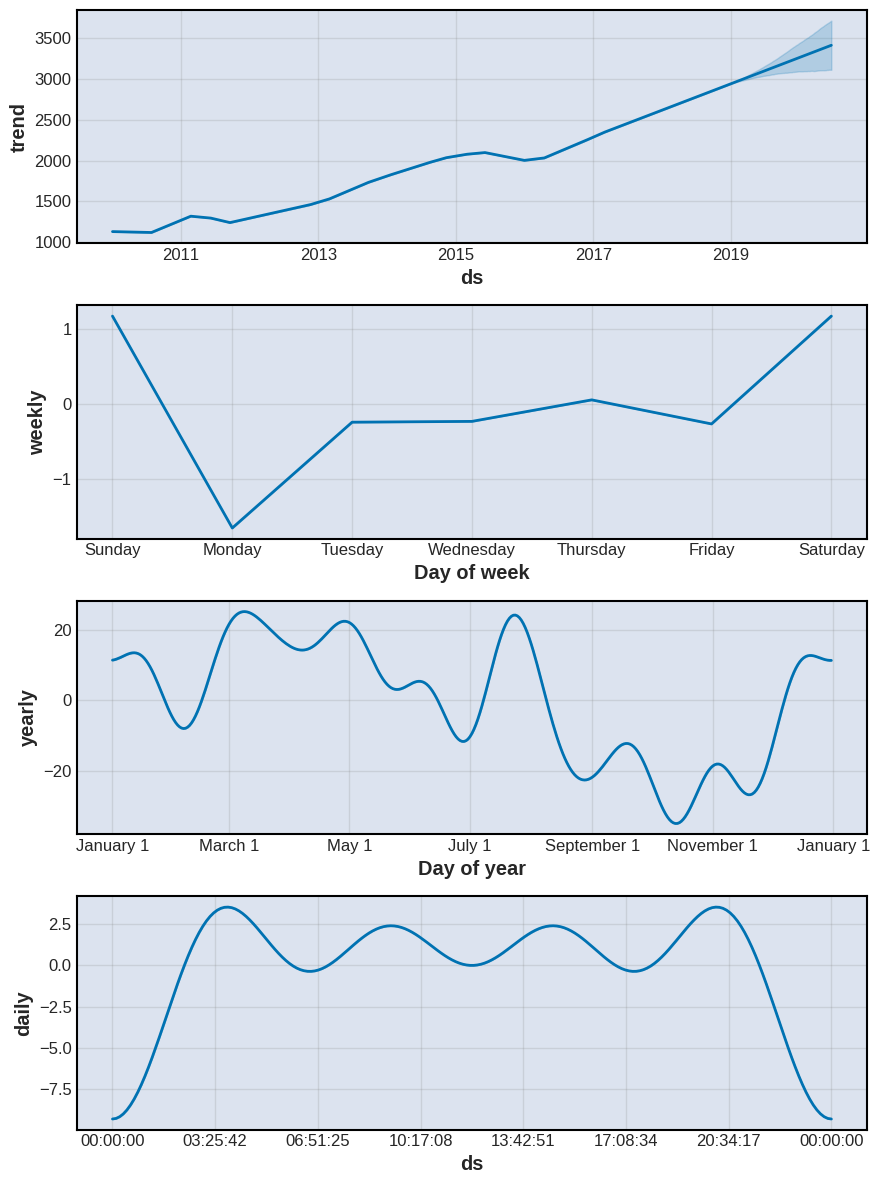

In [ ]:
fig2 = m.plot_components(prophet_prediction)
plt.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=validation.index, y=validation["Close"], mode='lines',name="Validation Data for Stock Prices",))
fig.add_trace(go.Scatter(x=validation.index, y=prophet_prediction[int(.8*len(sp500)):]['yhat'], mode='lines',name="Prediction for Stock Prices",))
fig.update_layout(title="PROPHET",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

In [ ]:
prophet_RMSE = math.sqrt(mean_squared_error(validation['Close'], prophet_prediction[int(.8*len(sp500)):]['yhat']))
print(prophet_RMSE)

253.97443363338795


As we can see, Prophet does a pretty poor job at predicting the Closing Price. It predicts a slowly increasing linear trend while the true price seems to job around much more. The RMSE is 253 which is significantly higher than our ARIMA model. 

## **Long Short-Term Memory (LSTM)**

LSTM is primarly used for sequence prediction problems. LSTM is a variation of a Recurrent Neural Network (RNN) with added parameters in order to support longer memory so that the forecasted time horizon can be longer. 

In [ ]:
#Create a new dataframe with only the Close column
data = sp500['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#LSTM are sensetive to scale of the data so we apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data.values.reshape(-1,1))
scaled_data

array([[0.03791226],
       [0.03912439],
       [0.03933728],
       ...,
       [0.96377715],
       [0.95753106],
       [0.98866512]])

In [ ]:
#Split into Train and Test Split 
train_size = int(len(scaled_data)*.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :1]

We decide to use the last 100 days to predict the next day stock price. 

In [ ]:
#Covert array of values into a dataset matrix
def create_dataset(dataset, time_step):
  dataX = []
  dataY = []
  for i in range(len(dataset)- time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+ time_step, 0])
  return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.03791226 0.03912439 0.03933728 ... 0.01753627 0.01766676 0.015579  ]
 [0.03912439 0.03933728 0.04089962 ... 0.01766676 0.015579   0.027635  ]
 [0.03933728 0.04089962 0.04202935 ... 0.015579   0.027635   0.0229479 ]
 ...
 [0.60488964 0.60821016 0.6014044  ... 0.55283029 0.56687094 0.56986518]
 [0.60821016 0.6014044  0.60973817 ... 0.56687094 0.56986518 0.59102412]
 [0.6014044  0.60973817 0.61077518 ... 0.56986518 0.59102412 0.58896729]]


In [ ]:
##Reshape input to be [samples, time steps, features] required for LSTM 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
#Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit the Model 
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size= 64, verbose = 1)

Epoch 1/100
34/34 [==============================] - 12s 217ms/step - loss: 0.0312 - val_loss: 0.0077
Epoch 2/100
34/34 [==============================] - 6s 184ms/step - loss: 4.2031e-04 - val_loss: 0.0032
Epoch 3/100
34/34 [==============================] - 6s 181ms/step - loss: 2.0156e-04 - val_loss: 0.0027
Epoch 4/100
34/34 [==============================] - 6s 183ms/step - loss: 1.8476e-04 - val_loss: 0.0027
Epoch 5/100
34/34 [==============================] - 6s 183ms/step - loss: 2.2522e-04 - val_loss: 0.0025
Epoch 6/100
34/34 [==============================] - 6s 187ms/step - loss: 2.0008e-04 - val_loss: 0.0027
Epoch 7/100
34/34 [==============================] - 6s 184ms/step - loss: 1.9267e-04 - val_loss: 0.0027
Epoch 8/100
34/34 [==============================] - 6s 186ms/step - loss: 1.7773e-04 - val_loss: 0.0025
Epoch 9/100
34/34 [==============================] - 6s 187ms/step - loss: 1.7911e-04 - val_loss: 0.0021
Epoch 10/100
34/34 [==============================] - 6s 1

In [ ]:
#Predictions 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#Transform back to Original Form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_1 = scaler.inverse_transform(y_test.reshape(-1,1))
y_train_1 = scaler.inverse_transform(y_train.reshape(-1,1))

In [ ]:
#Calculate RMSE 
train_RMSE = math.sqrt(mean_squared_error(y_train_1, train_predict))
print(train_RMSE)

test_RMSE = math.sqrt(mean_squared_error(y_test_1, test_predict))
print(test_RMSE)

30.39531558504724
58.29343774548294


In [97]:
test_predict_df = pd.DataFrame(test_predict, index= validation[101:].index, columns= ['Close'])
y_test_1_df = pd.DataFrame(y_test_1, index= validation[101:].index, columns = ['Close'])

In [99]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=y_test_1_df.index, y=y_test_1_df['Close'], mode='lines',name="Validation Data for Stock Prices",))
fig.add_trace(go.Scatter(x=test_predict_df.index, y=test_predict_df['Close'], mode='lines',name="Prediction for Stock Prices",))
fig.update_layout(title="LSTM",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

LSTM model also does a great job at predicting the closing price. The test data RMSE was 58.29, a bit higher than ARIMA(44). Similarly to ARIMA, it also is a bit delayed in predicting the spikes and falls. To further improve this model we can try different timesteps and compare the results. In addition, we can add prediction values to the last 100 days and use it to predict the next day Closing Price.

## **Building Classifier Model to Predict Price Movement of S&P 500**

A predictive model to accurately forecast future trends can be very important to the financial industry and the use of technical indicators for financial forecast is commonly used.

Our goal is to create a model that can accurately predict the movement of Closing Price the following day. In this case 1 if it goes up the next day and 0 if it goes down. 

### **Creating Technical Indicators**

Now, we will start creating different technical indicators using Ta-Lib. There are many technical indicators but we will use the most commonly used. 

In [ ]:
# download TA-Lib 
!wget -q http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null
!tar xvzf ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null

import os

os.chdir('ta-lib') # Can't use !cd in co-lab

!./configure --prefix=/usr 2>&1 > /dev/null
!make 2>&1 > /dev/null
!make install 2>&1 > /dev/null

os.chdir('../')

!pip install TA-Lib 2>&1 > /dev/null

import talib as ta

./configure: line 4354: /usr/bin/file: No such file or directory


In [ ]:
sp = sp500.copy()
sp

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2010-01-04,2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990
2010-01-05,2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020
2010-01-06,2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015
2010-01-07,2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941
2010-01-08,2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980
...,...,...,...,...,...,...,...
2021-02-23,2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117
2021-02-24,2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932
2021-02-25,2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088


**1. Simple Moving Average (SMA)**

A simple moving average (SMA) calculates the average of a selected range of values (closing price, colume, etc.), by the number of periods in that range.

In [ ]:
sp['SMA_10']  = ta.SMA(sp['Close'],10)
sp['SMA_20']  = ta.SMA(sp['Close'],20)
sp['SMA_50']  = ta.SMA(sp['Close'],50)
sp['SMA_100'] = ta.SMA(sp['Close'],100)
sp

,Date,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_20,SMA_50,SMA_100
Date,,,,,,,,,,,
2010-01-04,2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN,NaN,NaN,NaN
2010-01-05,2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,NaN,NaN,NaN,NaN
2010-01-06,2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,NaN,NaN,NaN,NaN
2010-01-07,2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,NaN,NaN,NaN,NaN
2010-01-08,2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,3911.479004,3866.065015,3796.660015,3651.515803
2021-02-24,2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,3912.898999,3869.855505,3801.806611,3657.140103
2021-02-25,2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,3904.845020,3873.784009,3805.124214,3661.625503


**2. Exponential Moving Average (EMA)**

An exponential moving average (EMA) is a type of moving average that places a greater weight and significance on the most recent data points.

In [ ]:
sp['EMA_10']  = ta.EMA(sp['Close'],10)
sp['EMA_20']  = ta.EMA(sp['Close'],20)
sp['EMA_50']  = ta.EMA(sp['Close'],50)
sp['EMA_100'] = ta.EMA(sp['Close'],100)
sp

,Date,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_20,SMA_50,SMA_100,EMA_10,EMA_20,EMA_50,EMA_100
Date,,,,,,,,,,,,,,,
2010-01-04,2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1132.989990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1136.520020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1137.140015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1141.689941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1144.979980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,3911.479004,3866.065015,3796.660015,3651.515803,3895.734305,3874.169610,3795.785749,3673.555193
2021-02-24,2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,3912.898999,3869.855505,3801.806611,3657.140103,3901.133510,3879.051545,3800.869834,3678.542812
2021-02-25,2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,3904.845020,3873.784009,3805.124214,3661.625503,3888.080160,3874.317121,3801.986315,3681.528897


**3. Average Directional Index (ADX)**

ADX indicated the overall strength of trend. It is a combination of the negative and positive directional movements indicated computed over a period of time. 

In [ ]:
sp['ADX'] = ta.ADX(sp['High'], sp['Low'], sp['Close'], timeperiod= 14)

**4. Relative Strength Index (RSI)**

RSI compares the size of recent gains to recent losses and is intened to chart the strength or weakness of a price based on closing prices over a period of time. 

In [ ]:
sp['RSI'] = ta.RSI(sp['Close'], timeperiod=14)

**5. Williams %R**

This exemplifies the relationship between the current closing price and the high and low prices over a period of time. 

In [ ]:
sp['Williams %R'] = ta.WILLR(sp['High'], sp['Low'], sp['Close'], timeperiod= 14)

**6. Stochastic %K**

This compares a closing price and its price interval during a period of time and is an indicator of over-selling or over-buying.

In [ ]:
sp['SO%K'] = ((sp['Close'] - sp['Low']) / (sp['High'] - sp['Low']))

Some of these variables created null values because there werent enough values in the window size to create a value so we will drop the null values.

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2808 entries, 2010-01-04 to 2021-03-01
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2808 non-null   object 
 1   High         2808 non-null   float64
 2   Low          2808 non-null   float64
 3   Open         2808 non-null   float64
 4   Close        2808 non-null   float64
 5   Volume       2808 non-null   int64  
 6   Adj Close    2808 non-null   float64
 7   SMA_10       2799 non-null   float64
 8   SMA_20       2789 non-null   float64
 9   SMA_50       2759 non-null   float64
 10  SMA_100      2709 non-null   float64
 11  EMA_10       2799 non-null   float64
 12  EMA_20       2789 non-null   float64
 13  EMA_50       2759 non-null   float64
 14  EMA_100      2709 non-null   float64
 15  ADX          2781 non-null   float64
 16  RSI          2794 non-null   float64
 17  Williams %R  2795 non-null   float64
 18  SO%K         2808 non-null   f

In [ ]:
sp = sp.dropna()
sp.shape

(2709, 19)

### **Creating the Target Variable**


In [ ]:
#Create the target column 
sp['Target'] = np.where(sp['Close'].shift(-1) > sp['Close'],1,0)
sp[['Close', 'Target']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Target
Date,,
2010-05-26,1067.949951,1
2010-05-27,1103.060059,0
2010-05-28,1089.410034,0
2010-06-01,1070.709961,1
2010-06-02,1098.380005,1
...,...,...
2021-02-23,3881.370117,1
2021-02-24,3925.429932,0
2021-02-25,3829.340088,0


In [ ]:
all = sp.drop(['Date'], axis = 1)
all

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_20,SMA_50,SMA_100,EMA_10,EMA_20,EMA_50,EMA_100,ADX,RSI,Williams %R,SO%K,Target
Date,,,,,,,,,,,,,,,,,,,
2010-05-26,1090.750000,1065.589966,1075.510010,1067.949951,4521050000,1067.949951,1104.081995,1135.112000,1166.005798,1139.916196,1099.059333,1124.408430,1145.002973,1139.916196,40.229129,31.775963,-79.539168,0.093799,1
2010-05-27,1103.520020,1074.270020,1074.270020,1103.060059,5698460000,1103.060059,1098.644006,1129.926001,1164.742800,1139.616897,1099.786738,1122.375252,1143.358153,1139.186372,40.358416,42.796389,-53.098827,0.984275,0
2010-05-28,1102.589966,1084.780029,1102.589966,1089.410034,4871210000,1089.410034,1094.017004,1125.062006,1163.214402,1139.145797,1097.900065,1119.235707,1141.242540,1138.200702,40.478468,40.085368,-63.378240,0.259968,0
2010-06-01,1094.770020,1069.890015,1087.300049,1070.709961,5271480000,1070.709961,1087.394006,1118.484503,1161.430601,1138.481497,1092.956409,1114.614208,1138.476557,1136.864251,40.913454,36.659240,-77.460690,0.032956,1
2010-06-02,1098.560059,1072.030029,1073.010010,1098.380005,5026360000,1098.380005,1085.152002,1114.723505,1160.082000,1138.048397,1093.942518,1113.068093,1136.904143,1136.102187,41.097826,44.251979,-56.623231,0.993213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,3911.479004,3866.065015,3796.660015,3651.515803,3895.734305,3874.169610,3795.785749,3673.555193,12.174784,54.833184,-47.680122,0.838368,1
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,3912.898999,3869.855505,3801.806611,3657.140103,3901.133510,3879.051545,3800.869834,3678.542812,12.509860,61.407276,-17.260444,0.953367,0
2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,3904.845020,3873.784009,3805.124214,3661.625503,3888.080160,3874.317121,3801.986315,3681.528897,13.565784,45.763138,-83.602578,0.137863,0


In [ ]:
#Scaling Data from values 0-1 to help models sensetive to high variance. 
from sklearn.preprocessing import minmax_scale
all = pd.DataFrame(minmax_scale(all), columns = all.columns)
all

,High,Low,Open,Close,Volume,Adj Close,SMA_10,SMA_20,SMA_50,SMA_100,EMA_10,EMA_20,EMA_50,EMA_100,ADX,RSI,Williams %R,SO%K,Target
0,0.019812,0.018771,0.016436,0.015579,0.394898,0.015579,0.018682,0.024341,0.031025,0.017396,0.016952,0.020201,0.021680,0.016295,0.684133,0.218120,0.204608,0.093799,1.0
1,0.024189,0.021751,0.016010,0.027635,0.527893,0.027635,0.016784,0.022501,0.030562,0.017280,0.017207,0.019478,0.021075,0.016014,0.686889,0.375041,0.469012,0.984275,0.0
2,0.023870,0.025359,0.025735,0.022948,0.434451,0.022948,0.015170,0.020775,0.030003,0.017097,0.016546,0.018362,0.020297,0.015633,0.689448,0.336439,0.366218,0.259968,0.0
3,0.021190,0.020248,0.020484,0.016527,0.479663,0.016527,0.012858,0.018441,0.029350,0.016839,0.014813,0.016718,0.019280,0.015117,0.698721,0.287654,0.225393,0.032956,1.0
4,0.022489,0.020982,0.015577,0.026028,0.451976,0.026028,0.012076,0.017106,0.028856,0.016671,0.015159,0.016168,0.018702,0.014823,0.702651,0.395768,0.433768,0.993213,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,0.981337,0.959402,0.971655,0.981643,0.593655,0.981643,0.998445,0.993510,0.994185,0.992365,0.997135,0.998264,0.996154,0.994267,0.086076,0.546435,0.523199,0.838368,1.0
2705,0.992535,0.977943,0.977369,0.996772,0.555442,0.996772,0.998941,0.994856,0.996070,0.994548,0.999027,1.000000,0.998023,0.996192,0.093219,0.640044,0.827396,0.953367,0.0
2706,0.991290,0.962303,0.991823,0.963777,0.619907,0.963777,0.996130,0.996250,0.997284,0.996289,0.994452,0.998316,0.998434,0.997345,0.115729,0.417285,0.163974,0.137863,0.0
2707,0.969374,0.953892,0.965676,0.957531,0.619894,0.957531,0.992458,0.996672,0.998483,0.998085,0.989550,0.996176,0.998566,0.998336,0.144128,0.385113,0.134315,0.302067,1.0


In [ ]:
#Splitting into Train/Test Data 
from sklearn.model_selection import train_test_split
X = all.drop(["Target"],axis=1)
Y = all["Target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### **Selecting the Best Features** 

Using a Random Forest Classifier, we will fit a model and choose the columns which best predict price movement. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(X_train, Y_train):
    # Remove non-numeric columns, columns that have null values
    all_X = X_train
    all_y = Y_train
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf,cv=10)
    selector.fit(all_X,all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    
    return best_columns

cols = select_features(X_train, Y_train)

Best Columns 
------------
['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'EMA_10', 'EMA_50', 'EMA_100', 'ADX', 'RSI', 'Williams %R', 'SO%K']



### **Finding the Best Model**

Using GridSearchCV we will test to see which model and model's hyperparameters best fit the data. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier 



def select_model(X_train, Y_train,features):
    
    all_X = X_train[features]
    all_y = Y_train

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
        {
            "name": "SupportVectorClassification",
            "estimator": SVC(),
            "hyperparameters":
                {
                    'C': [0.1, 1, 10, 100, 1000],  
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'kernel': ['rbf']
                }
        },
        {
            "name": "StochasticGradientDescent",
            "estimator": SGDClassifier(),
            "hyperparameters":
                {
                    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],  
                  'penalty': ['l1', 'l2', 'elasticnet'], 
                  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                    'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
                    'eta0': [1, 10, 100] 
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

result = select_model(X_train, Y_train,cols)

LogisticRegression
------------------
Best Score: 0.5477662570404505
Best Parameters: {'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best Score: 0.5237412527735109
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}

RandomForestClassifier
----------------------
Best Score: 0.5519137224782387
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 6}

SupportVectorClassification
---------------------------
Best Score: 0.5547085680150197
Best Parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

StochasticGradientDescent
-------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteratio

Best Score: 0.5565476190476191
Best Parameters: {'alpha': 0.0001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 100, 'learning_rate': 'constant', 'loss': 'modified_huber', 'penalty': 'l2'}



The results were pretty close, here are the models and their best acurracy score: 


*   Logistic Regression: 54.77%
*   K-Nearest Neighbors: 52.37%
*   Random Forest: 55.19%
*   Support Vector Classifier: 55.47%
*   Stochastic Gradient Descent: 55.65%

Stochastic Gradient Descent is our best performing model but not by much. We will use it to forecast our test data. 



In [64]:
best_classif_model = result[2]["best_model"]
holdout_data = X_test[cols]
classif_predictions = best_classif_model.predict(holdout_data)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, classif_predictions))

              precision    recall  f1-score   support

         0.0       0.52      0.23      0.32       248
         1.0       0.56      0.82      0.66       294

    accuracy                           0.55       542
   macro avg       0.54      0.53      0.49       542
weighted avg       0.54      0.55      0.51       542



Stochastic Gradient Descent performed descently well on the test data as well with an accuracy of 55%. Although it is not much higher than simply flipping a coin to decide. In addition, SGD performed well but is much more time-extensive and one can choose to go with a simpler model like Decision Trees at the cost of about ~1% error on training data. 

## **Conclusion**

Our models, both forecasting and classification, performed decently well but are no where near ready for use in real trading. They are promising for exploring Deep Learning, Machine Learning, and Time Series Models. I hope to continue to improve the models possibly with use of other indicators, more data, hyperparamater tuning. 

In addition, I hope to implement a program that uses the model to invest $X over the course of Y day and see what the returns would look like. 

## **References:**



*   https://towardsdatascience.com/stock-market-analysis-using-arima-8731ded2447a
*   https://github.com/tkLouie/PyData_LA_2018/blob/master/PyData_LA_2018_Tutorial.ipynb
*   https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
*   https://github.com/saurabbhsp/Arima
*   https://randerson112358.medium.com/build-a-simple-stock-movement-classifier-using-machine-learning-python-3fc3aac18b0
*   https://medium.com/analytics-vidhya/stock-trend-prediction-with-technical-indicators-feature-engineering-and-python-code-1fa54d5806ba

